<a href="https://colab.research.google.com/github/abm4github/Airbnb-EDA/blob/main/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

**Data Source**

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values

In [2]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
# loading and inspecting data

df=pd.read_csv('Airbnb NYC 2019.csv')

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
# retrieving all column names

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### **Understanding, Wrangling and Cleaning Data**

In [5]:
# inspecting dataset for null values

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# cleaning data by removing unnecessary columns/fields
# note:'host_name' is to be deleted for ethical reasons

df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)


In [7]:
df.sample(4)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
37395,183417610,Queens,Elmhurst,40.73841,-73.87751,Private room,180,1,0,NaN,3,0
40553,20445702,Manhattan,Lower East Side,40.70983,-73.98562,Shared room,249,60,0,NaN,1,0
4538,7361593,Manhattan,West Village,40.72976,-74.00445,Entire home/apt,115,3,2,0.03,1,0
20433,82646321,Manhattan,Hell's Kitchen,40.76428,-73.99381,Entire home/apt,130,2,77,3.63,1,9


In [8]:
# replacing null values of 'reviews_per_month' with zeros

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [9]:
# confirming that there are non null values in our dataset

df.isna().sum().sum()

0

making sure that there are no missing values, let's inspect some interesting categorical unique values 

In [10]:
# checking for unique iterations in 'neighbourhood_group' field/ column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
# checking for sum of unique iterations in 'neighbourhood' field/ column 
len(df.neighbourhood.unique())

221

In [12]:
# checking for unique iterations in 'room_type' field/ column 
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

**Exploring and Visualizing Data**

we are now ready to explore the data statistically and to visualize the values of features and correlations between different features.

Here, we can make a rule that we start to work from left to right, so that no column is missed out from exploration

In [13]:
# let us see what 'host_id's (hosts), holds most listings on Airbnb
# top 10

top_hosts = df.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [14]:
# using alternate way  to confirm the above finding
# top host 

top_host = df.calculated_host_listings_count.max()
top_host

327

In [15]:
# setting figure size for visusalization

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [16]:
# creating dataframe of 'host_id's and their listings
df_top_hosts = pd.DataFrame(top_hosts)
df_top_hosts.reset_index(inplace = True)
df_top_hosts.rename(columns={'index':'Host_ID','host_id':'N_Listings'},
                    inplace=True)
df_top_hosts

,Host_ID,N_Listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

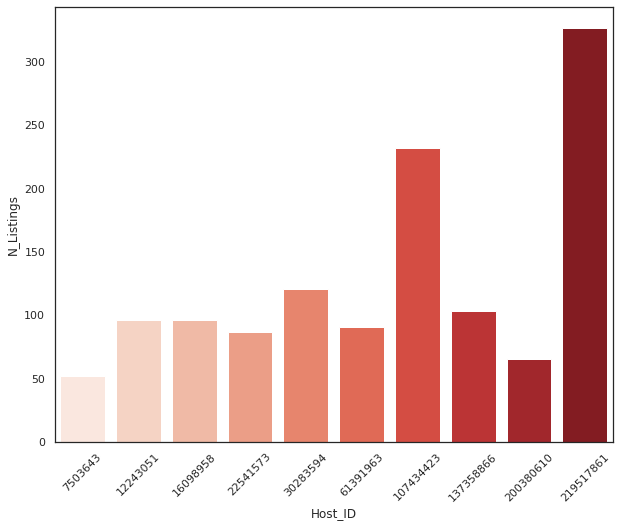

In [17]:
viz_HostId_Listings = sns.barplot(x='Host_ID', y='N_Listings', 
                                  data =df_top_hosts, palette='Reds')
viz_HostId_Listings.set_xticklabels(viz_HostId_Listings.get_xticklabels(),
                                    rotation = 45)

Here we can observe the distribution of number of listings by top ten hosts on Airbnb, the maximum number of listing by any is above 300

In [18]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
# Let's discover the relationship between the 'neighbourhood_group's and 'price'

df_Brooklyn = df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_Brooklyn = df_Brooklyn['price'].mean()
print('the mean price a Airbnb in Brooklyn is:',price_Brooklyn)

df_Manhattan = df.loc[df['neighbourhood_group'] == 'Manhattan']
price_Manhattan = df_Manhattan[['price']].mean()
print('the mean price a Airbnb in Manhattan is:',price_Manhattan)

df_Queens = df.loc[df['neighbourhood_group'] == 'Queens']
price_Queens = df_Queens[['price']].mean()
print('the mean price a Airbnb in Queens is:',price_Queens)

df_Staten_Island = df.loc[df['neighbourhood_group'] == 'Staten Island']
price_Staten_Island = df_Staten_Island[['price']].mean()
print('the mean price a Airbnb in Staten_Island is:',price_Staten_Island)

df_Bronx = df.loc[df['neighbourhood_group'] == 'Bronx']
price_Bronx = df_Bronx[['price']].mean()
print('the mean price a Airbnb in Bronx is:',price_Bronx)



the mean price a Airbnb in Brooklyn is: 124.38320732192598
the mean price a Airbnb in Manhattan is: price    196.875814
dtype: float64
the mean price a Airbnb in Queens is: price    99.517649
dtype: float64
the mean price a Airbnb in Staten_Island is: price    114.812332
dtype: float64
the mean price a Airbnb in Bronx is: price    87.496792
dtype: float64


We can notice that the average price of Airbnb is higher in Manhattan followed by that of Brooklyn

In [20]:
# let us now plot all the Airbnbs on a map, to check demographical influence
# on price and on other parameters

import plotly.express as px
import plotly.express as px
viz_Airbnb_map = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                                   color="neighbourhood_group",
                                   color_discrete_map={
                                                      'Bronx': '#222A2A', 
                                                      'Brooklyn': '#2E91E5', 
                                                      'Manhattan': '#FC0080',
                                                      'Queens': '#750D86',  
                                                      'Staten Island': '#0000EE'
                                                      }, zoom=10, height=780,
                                                      width =1000)
viz_Airbnb_map.update_layout(mapbox_style="open-street-map")
viz_Airbnb_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
viz_Airbnb_map.show()

If we observe that the Airbnbs are considerably more in number in 'neighbourhood_group's 'Manhattan' and 'Brooklyn' which defines the higher demand of Airbnbs in those 'neighbourhood_group', from this we can assess that they attract maximum tourists.
Moreover,we can even assess that the average price of Airbnb in those 'neighbourhood_group's higher in comparision to that of in other 'neighbourhood_group's due to its high demand.

In [21]:
df.columns
# host_id, place, room_type, price, minimum_nights

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [26]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

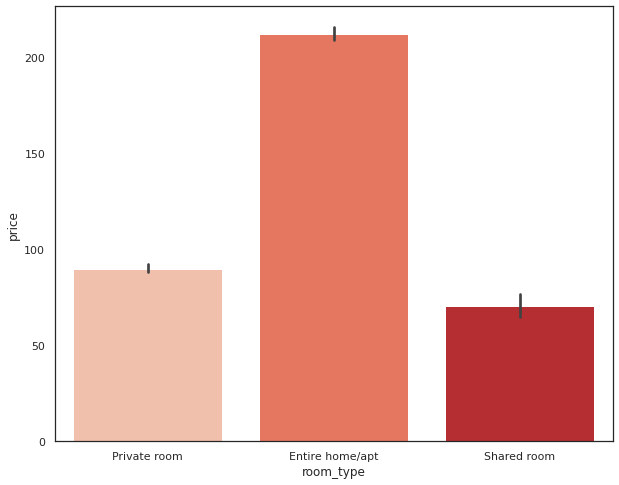

In [60]:
viz_price_room_type = sns.barplot(x='room_type', y='price', data= df, palette='Reds')
viz_price_room_type

In [47]:
df_room_type_price.describe()

price                          ...                       
                   count        mean         std  ...    50%    75%      max
room_type                                         ...                       
Entire home/apt  25409.0  211.794246  284.041611  ...  160.0  229.0  10000.0
Private room     22326.0   89.780973  160.205262  ...   70.0   95.0  10000.0
Shared room       1160.0   70.127586  101.725252  ...   45.0   75.0   1800.0

[3 rows x 8 columns]

In [61]:
# limiting the house prices to 400, as majority of the prices falls below it, to 
# avoid outliers

df_room_type_price=df[['room_type', 'price']]
df_room_type_price = df_room_type_price[df_room_type_price.price < 400]
df_room_type_price = df_room_type_price.groupby('room_type')
price_room_type = df_room_type_price.mean()
price_room_type

,price
room_type,
Entire home/apt,170.040302
Private room,80.273526
Shared room,60.562555
